**Crime Pattern in Los Angeles(2020-Present)**

Yibin Hu

[Link to our GitHub webpage](yibhu.github.io)

**Project Goals:**  
The primary goal of this project is to analyze and understand the crime patterns in Los Angeles by using [Crime Data from 2020 to Present](https://catalog.data.gov/dataset/crime-data-from-2020-to-present). This will not only provide insights into the nature of crimes but also help identify potential hotspots, temporal trends, and factors that might influence these crimes. The following are some potential objectives:

1. **Temporal Analysis:**  
   - Identify trends in crime rates over time (e.g., monthly, annually).
   - Determine if certain times of the year or specific days are more prone to certain types of crimes.

2. **Geographical Analysis:**  
   - Identify high-crime areas or 'hotspots' within Los Angeles.
   - Analyze if certain types of crimes are more prevalent in specific regions.

3. **Nature and Type of Crime:**  
   - Classify crimes based on their severity and nature.
   - Determine the most frequent types of crimes and see if they correlate with specific areas or times.

4. **Demographics:**  
   - Understand the demographics of victims and see if certain demographics are more prone to specific types of crimes.
   - Similarly, analyze if the demographic information about suspects can be correlated with specific types of crimes.

5. **External Factors:**  
   - If possible, correlate crime rates with other external factors such as economic downturns, festivals, major events, etc., to see if they influence crime rates.

6. **Predictive Analysis:**  
   - Based on the current data, attempt to predict future crime rates or potential hotspots.

By the end of this project, we aim to provide a comprehensive view of the crime situation in Los Angeles, which can aid law enforcement in better allocation of resources, policy-making, and public awareness initiatives.

**Extract and Load Data**

Data Source: Crime Data from 2020 to Present from the City of Los Angeles

Data Collection: The data has been collected and published by the City of Los Angeles. It reflects incidents of crime in the City of Los Angeles dating back to 2020.

In [6]:
import requests
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Direct link to the CSV file
url = 'https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD'
filename = 'Crime Data from 2020 to Present.csv'

# Check if file already exists
if not os.path.exists(filename):
    response = requests.get(url)
    with open(filename, 'wb') as file:
        file.write(response.content)

**Table Info**

DR_NO: Records Number

Date Rptd: Date Reported 

AREA: Geographic Areas governed by 21 LAPD Police Stations are sequentially numbered from 1-21.

Rpt Dist No: A four-digit code that represents a sub-area within a Geographic Area.

Crm Cd Desc: Description of crime commited corresponding to Crm Cd, which is Crime code

Vict Age: Victim Age

Crm Cd: A case can have multiple Crime Code if multiple crimes are conducted


A more detailed column specification can be found in the [source website](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8)

In [4]:
df = pd.read_csv(filename)

# Correct date types
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])

# Set 'LON' and 'LAT' to NaN where they are 0
df.loc[df['LON'] == 0, 'LON'] = np.nan
df.loc[df['LAT'] == 0, 'LAT'] = np.nan

display(df.head())  
display(df.dtypes)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC                  object
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
dtype: object

**Exploratory Data Analysis**

Plot the crimes over map, and from the geographical region where crimes happen, we can see there are region with high crime frequency. A further investigation is required to study this phenomena to draw conclusion.

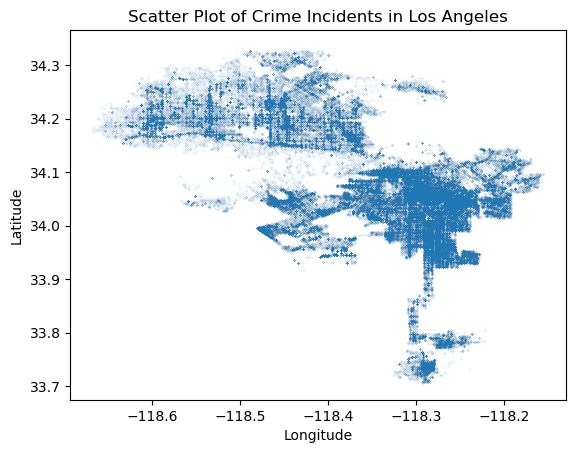

In [22]:
plt.scatter(df['LON'], df['LAT'], s=0.0001)
plt.title("Scatter Plot of Crime Incidents in Los Angeles")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

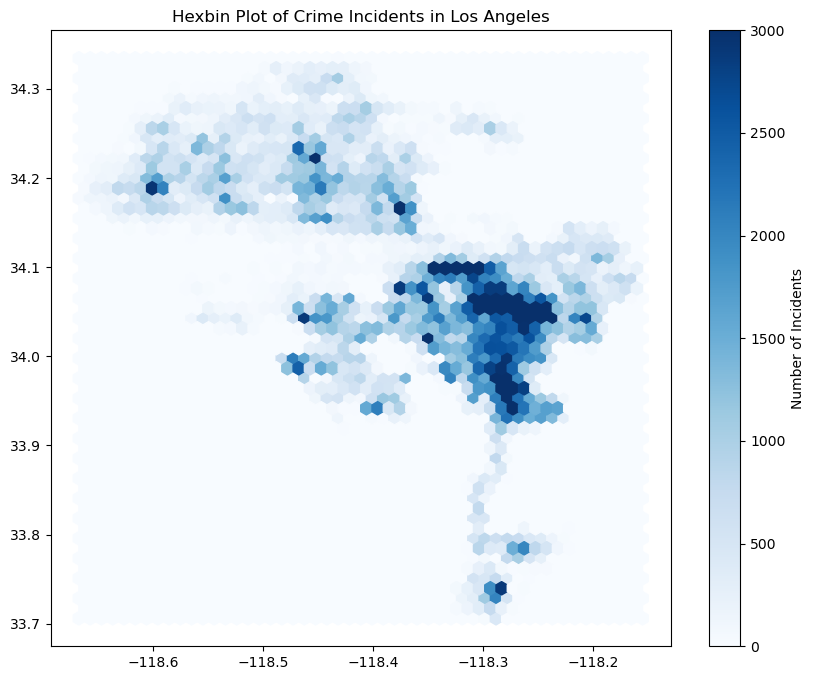

In [18]:
plt.figure(figsize=(10, 8))
hb = plt.hexbin(data=df, x="LON", y="LAT", gridsize=50, cmap="Blues", vmin=0, vmax=3000)
plt.colorbar(hb, label="Number of Incidents")
plt.title("Hexbin Plot of Crime Incidents in Los Angeles")
plt.show()